In [5]:
import pandas as pd
from analysis import *
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
surge_annotations = data.surge_evaluation.annotation_dataframe()
surge_annotations_comparative = data.surge_evaluation.comparative_annotation_dataframe()

surge_annotations

0  \
bot            category        label           item                               
blender2_3B    likert dialogue proactive       (1048,38)_blender2_3B          4   
                               engaging        (1048,38)_blender2_3B          4   
                               relevant        (1048,38)_blender2_3B          3   
                               emotional       (1048,38)_blender2_3B          4   
                               grammatical     (1048,38)_blender2_3B          4   
...                                                                          ..   
rerank_blender behavior        lack of empathy ((441,26)_rerank_blender, 14)  0   
                               follow up       ((441,26)_rerank_blender, 14)  1   
                               topic switch    ((441,26)_rerank_blender, 14)  0   
                               ignore          ((441,26)_rerank_blender, 14)  0   
                               irrelevant      ((441,26)_rerank_blender, 14)  0   

                                                                                1  \
bot            category        label           item                                 
blender2_3B    likert dialogue proactive       (1048,38)_blender2_3B          4.0   
                               engaging        (1048,38)_blender2_3B          5.0   
                               relevant        (1048,38)_blender2_3B          4.0   
                               emotional       (1048,38)_blender2_3B          5.0   
                               grammatical     (1048,38)_blender2_3B          4.0   
...                                                                           ...   
rerank_blender behavior        lack of empathy ((441,26)_rerank_blender, 14)  NaN   
                               follow up       ((441,26)_rerank_blender, 14)  NaN   
                               topic switch    ((441,26)_rerank_blender, 14)  NaN   
                               ignore          ((441,26)_rerank_blender, 14)  NaN   
                               irrelevant      ((441,26)_rerank_blender, 14)  NaN   

                                                                               2  
bot            category        label           item                               
blender2_3B    likert dialogue proactive       (1048,38)_blender2_3B         NaN  
                               engaging        (1048,38)_blender2_3B         NaN  
                               relevant        (1048,38)_blender2_3B         NaN  
                               emotional       (1048,38)_blender2_3B         NaN  
                               grammatical     (1048,38)_blender2_3B         NaN  
...                                                                           ..  
rerank_blender behavior        lack of empathy ((441,26)_rerank_blender, 14) NaN  
                               follow up       ((441,26)_rerank_blender, 14) NaN  
                               topic switch    ((441,26)_rerank_blender, 14) NaN  
                               ignore          ((441,26)_rerank_blender, 14) NaN  
                               irrelevant      ((441,26)_rerank_blender, 14) NaN  

[151824 rows x 3 columns]

In [7]:
from itertools import combinations
from scipy.stats import ttest_ind

def t_tests(df: pd.DataFrame):
    """
    :param df: (bot, data point) x 1 -> score
    :return: p values of test on each bot pair (pd.Series)
    """
    bots = set(df.index.get_level_values(0))
    bot_pairs = list(combinations(bots, 2))
    result = {}
    for ba, bb in bot_pairs:
        a = df.xs(ba).to_numpy().squeeze()
        b = df.xs(bb).to_numpy().squeeze()
        t, p = ttest_ind(a, b)
        result[(ba, bb)] = p
    result_series = pd.Series(result.values(), result)
    return result_series

pvalues0 = get_singly_annotated(surge_annotations).groupby(
    [sym.category, sym.label]
).apply(
    t_tests
)
pvalues0

emora                \
                                          bart_fid_rag_bcb   blender2_3B   
category        label                                                      
behavior        antisocial                    3.157950e-01  2.532315e-02   
                commonsense contradiction     4.054929e-14  2.602085e-04   
                correct fact                  2.534296e-63  5.644115e-19   
                empathetic                    9.240917e-06  5.291553e-01   
                follow up                     6.876632e-35  6.585991e-34   
                ignore                        6.152786e-01  7.134522e-03   
                incorrect fact                2.279894e-57  5.191524e-04   
                irrelevant                    2.188009e-03  7.334755e-05   
                lack of empathy               2.042251e-01  4.402950e-14   
                life info                     6.123935e-06  1.223562e-06   
                partner contradiction         1.138981e-01  2.140544e-01   
                preference info               3.386422e-18  5.091158e-18   
                redundant                     6.029427e-01  1.694653e-02   
                self contradiction            2.718372e-38  3.672269e-19   
                topic switch                  3.362866e-35  1.042829e-17   
                uninterpretable               8.489174e-05  9.992592e-01   
comparative     consistent                    1.449908e-04  1.135192e-05   
                emotional                     4.282783e-03  2.704096e-01   
                engaging                      5.468335e-02  9.449324e-01   
                grammatical                   5.426987e-01  5.927191e-02   
                informative                   1.609217e-01  3.118352e-02   
                proactive                     8.534128e-06  9.135735e-02   
                quality                       9.027718e-02  1.402627e-01   
                relevant                      3.338348e-03  7.416844e-02   
likert dialogue consistent                    1.005119e-06  9.576594e-03   
                emotional                     6.178520e-01  9.546769e-07   
                engaging                      5.184026e-04  4.020366e-02   
                grammatical                   3.007567e-02  1.149575e-01   
                informative                   3.228164e-02  2.858056e-01   
                proactive                     1.111605e-15  4.583474e-01   
                quality                       2.942707e-05  2.596288e-01   
                relevant                      1.000000e+00  5.476967e-05   
likert turn     consistent                    3.357942e-05  6.159024e-01   
                emotional                     3.634287e-02  7.284234e-12   
                engaging                      3.685358e-09  7.465968e-02   
                grammatical                   1.325396e-14  3.756832e-06   
                informative                   1.293966e-53  4.354247e-09   
                proactive                     3.298631e-80  1.274521e-05   
                quality                       7.419651e-06  2.743109e-09   
                relevant                      6.252719e-02  9.040205e-18   

                                                         bart_fid_rag_bcb  \
                                          rerank_blender      blender2_3B   
category        label                                                       
behavior        antisocial                  2.466070e-03     1.042447e-01   
                commonsense contradiction   2.198897e-08     7.868948e-05   
                correct fact                2.794497e-17     7.200331e-16   
                empathetic                  3.907979e-01     4.092259e-07   
                follow up                   3.541851e-01     8.372144e-01   
                ignore                      4.325359e-04     2.883019e-02   
                incorrect fact              1.344343e-67     4.353065e-49   
              

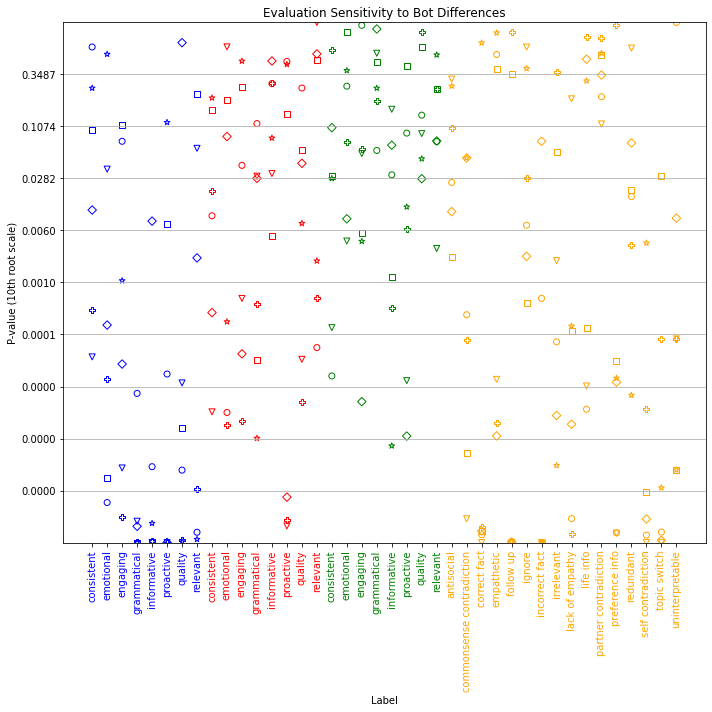

In [41]:
# shape => bot pair
# color => evaluation procedure
# x-axis => label

# Build the plot
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

def plot_by_category(ax, df, category, color, xaxis_start, symbols):
    extracted = df[df["category"] == category]

    botpairs_pvalues = extracted.iloc[:,2:]
    botpairs = botpairs_pvalues.columns.tolist()
    labels = extracted['label'].tolist()
    xaxis_end = xaxis_start + len(labels)

    for col in botpairs_pvalues:
        pvalues = botpairs_pvalues[col]
        xs = np.arange(xaxis_start, xaxis_end)
        ax.scatter(xs,
                   pvalues,
                   marker=symbols[tuple(sorted(col))],
                   edgecolors=color,
                   facecolors='none')

    return labels, xaxis_end

likert_turn_color = "blue"
likert_dialogue_color = "red"
comparative_color = "green"
behavior_color = "orange"

symbols = {
    tuple(sorted(('emora', 'blender2_3B'))): 'o',
    tuple(sorted(('emora', 'bart_fid_rag_bcb'))): 'v',
    tuple(sorted(('emora', 'rerank_blender'))): 's',
    tuple(sorted(('bart_fid_rag_bcb', 'blender2_3B'))): 'P',
    tuple(sorted(('rerank_blender', 'blender2_3B'))): '*',
    tuple(sorted(('rerank_blender', 'bart_fid_rag_bcb'))): 'D'
}

pvalues = pvalues0.reset_index()
ltl, likert_dialogue_start = plot_by_category(ax, pvalues, "likert turn", likert_turn_color, 0, symbols)
ldl, comparative_start = plot_by_category(ax, pvalues, "likert dialogue", likert_dialogue_color, likert_dialogue_start, symbols)
cl, behavior_start = plot_by_category(ax, pvalues, "comparative", comparative_color, comparative_start, symbols)
bl, misc_start = plot_by_category(ax, pvalues, "behavior", behavior_color, behavior_start, symbols)

category_range = {likert_dialogue_start: likert_turn_color, comparative_start: likert_dialogue_color, behavior_start: comparative_color, misc_start: behavior_color}
xaxis_colors = {}
prev_idx = 0
for idx, color in category_range.items():
    for i in range(prev_idx, idx):
        xaxis_colors[i] = color
    prev_idx = idx

ax.set_xlabel("Label")
ax.set_ylabel("P-value (10th root scale)")
xpos = np.arange(len(pvalues))
import math
import numpy as np
root_scale = 10
def myscale(vals):
    return np.array([
        v ** (1/root_scale) for v in vals
    ])
def myscaleinv(vals):
    return np.array([
        v ** root_scale for v in vals
    ])
plt.yscale('function', functions=(myscale, myscaleinv))
ax.set_yticks([y ** 10 for y in np.arange(0, 1, 0.1)])
plt.ylim(math.pow(10, -67), 1)
ax.set_xticks(xpos)
ax.set_xticklabels(ltl+ldl+cl+bl, rotation=90)
for tickloc, ticklabel in zip(plt.gca().get_xticks(), plt.gca().get_xticklabels()):
    ticklabel.set_color(xaxis_colors[tickloc])
ax.set_title('Evaluation Sensitivity to Bot Differences')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

In [9]:
# ^ y-axis log scale 0.001, 0.01, 0.1,